## Import statements

In [13]:
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt

from pylab import rcParams
from scipy.ndimage import imread
from skimage.transform import warp

#ipython setting
rcParams['figure.figsize'] = (20, 12)

## Affine transforms

--text--

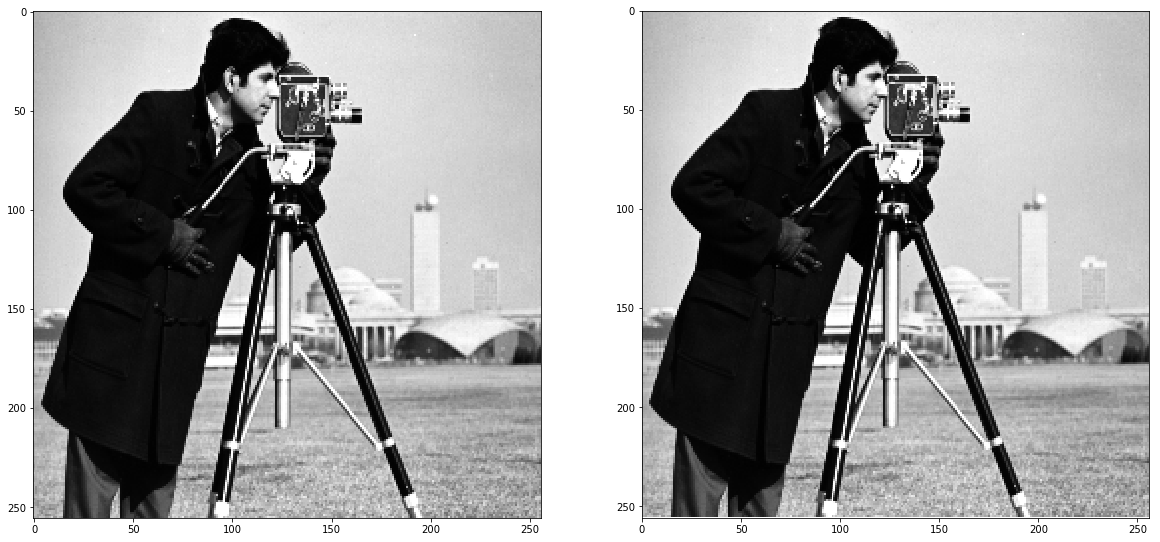

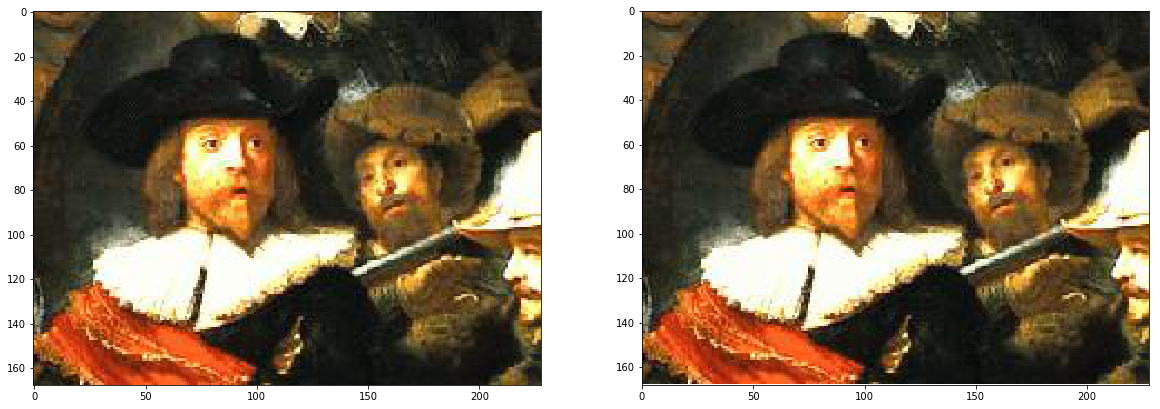

In [143]:
def affineTransform(f, x1, y1, x2, y2, x3, y3, width, height):
    
    M = np.array([[x1, y1, 1, 0, 0, 0],
                  [0, 0, 0, x1, y1, 1],
                  [x2, y2, 1, 0, 0, 0],
                  [0, 0, 0, x2, y2, 1],
                  [x3, y3, 1, 0, 0, 0],
                  [0, 0, 0, x3, y3, 1]])
    
    q = np.array([0, 0, width - 1, 0, 0, height - 1])
    
    p = np.linalg.lstsq(M,q)
    p = p[0].reshape((2, 3))
    p = np.vstack((p, np.array([0, 0, 1])))
    
    p = np.linalg.inv(p)
    
    f_trans = warp(f, p, order=5, mode='reflect')
    
    return f_trans  

def plot_image_affine(filename, a):
    
    f = imread(filename)
    rng_x, rng_y = len (f[0]), len(f)
    f_trans = affineTransform(f, a[0], a[1], a[2], a[3], a[4], a[5], rng_x, rng_y)

    fig, axarr = plt.subplots(1, 2)
    axarr[0].imshow(f, cmap='gray')
    axarr[1].imshow(f_trans, cmap='gray')
    axarr[1].set_xlim([0, rng_x])
    axarr[1].set_ylim([rng_y, 0])
    plt.show()

args1 = [0, 0, 255, 0, 0, 255]
plot_image_affine('cameraman1.png', args1)
args2 = [0, 0, 227, 0, 0, 167]
plot_image_affine('nachtwacht1.jpg', args2)

## Perspective transform

--text--

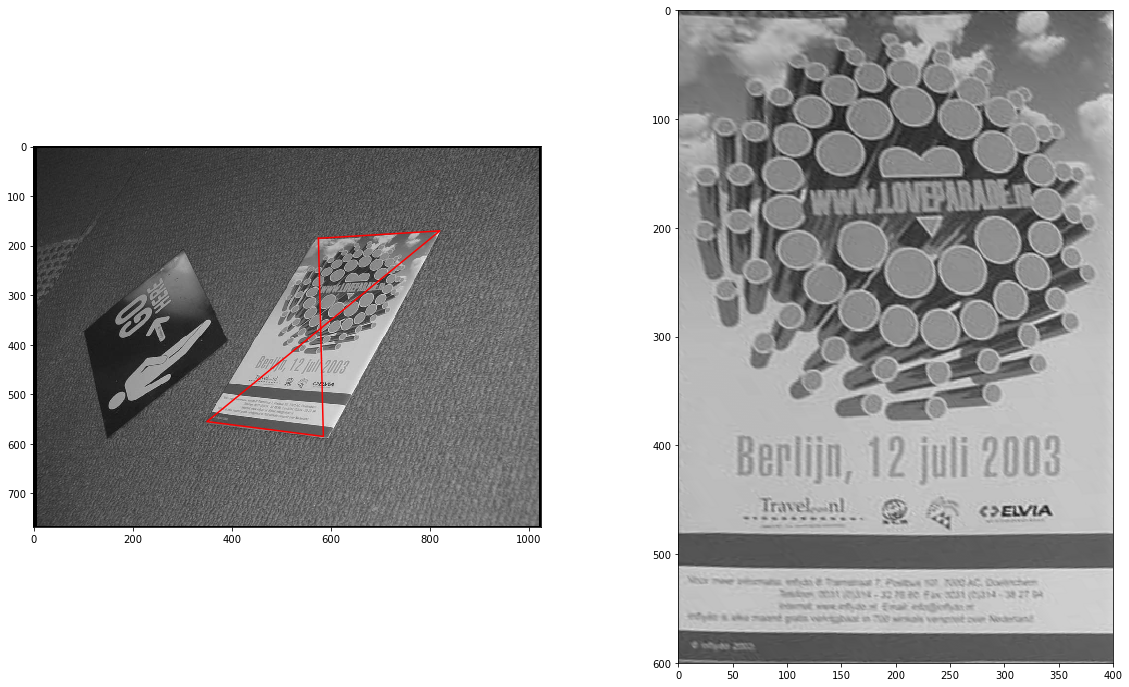

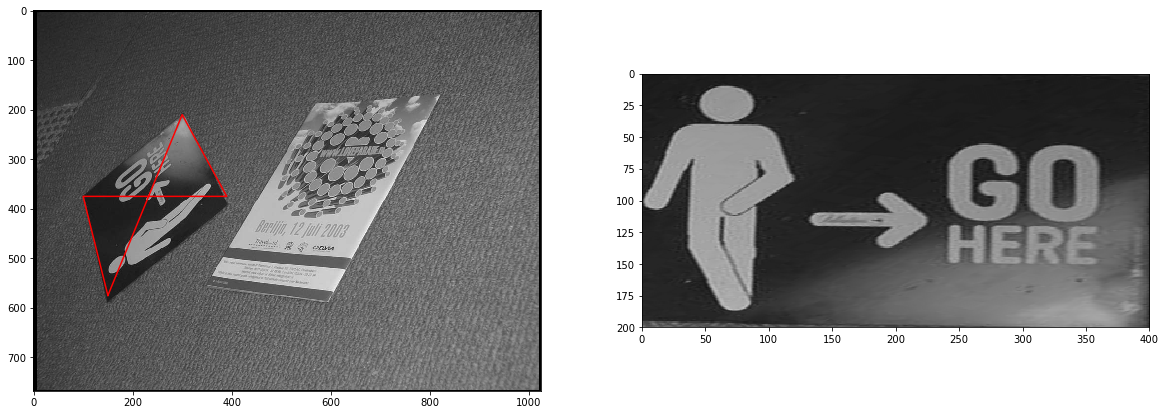

In [144]:
def perspectiveTransform(f, x1, y1, x2, y2, x3, y3, x4, y4, width, height):
    
    x1_p, y1_p = 0, 0
    x2_p, y2_p = width - 1, 0
    x3_p, y3_p = 0, height - 1
    x4_p, y4_p = width - 1, height - 1
    
    M = np.array([[x1, y1, 1, 0, 0, 0, -x1 * x1_p, -x1_p * y1, -x1_p],
                  [0, 0, 0, x1, y1, 1, -x1 * y1_p, -y1_p * y1, -y1_p],
                  [x2, y2, 1, 0, 0, 0, -x2 * x2_p, -x2_p * y2, -x2_p],
                  [0, 0, 0, x2, y2, 1, -x2 * y2_p, -y2_p * y2, -y2_p],
                  [x3, y3, 1, 0, 0, 0, -x3 * x3_p, -x3_p * y3, -x3_p],
                  [0, 0, 0, x3, y3, 1, -x3 * y3_p, -y3_p * y3, -y3_p],
                  [x4, y4, 1, 0, 0, 0, -x4 * x4_p, -x4_p * y4, -x4_p],
                  [0, 0, 0, x4, y4, 1, -x4 * y4_p, -y4_p * y4, -y4_p]])
    
    U, D, V_t = np.linalg.svd(M)
    # Takin the last row of V_t (same as last column of V) and reshape to 3x3 matrix
    p = V_t[-1].reshape((3, 3))
    f_trans = warp(f, np.linalg.inv(p), order=3, mode='reflect')
    return f_trans

def plot_image_perspective(filename, a):
    
    f = imread(filename)
    f_trans = perspectiveTransform(f, a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8], a[9])

    fig, axarr = plt.subplots(1, 2)
    axarr[0].imshow(f, cmap='gray')
    axarr[0].plot([a[0], a[2], a[4], a[6], a[0]], [a[1], a[3], a[5], a[7], a[1]], color='r')
    axarr[1].imshow(f_trans, cmap='gray')
    axarr[1].set_xlim([0, a[8]])
    axarr[1].set_ylim([a[9], 0])
    plt.show()

args1 = [575, 185, 820, 170, 350, 555, 585, 585, 400, 600]
plot_image_perspective('flyeronground.png', args1)
args2 = [150, 575, 100, 375, 390, 375, 300, 210, 400, 200]
plot_image_perspective('flyeronground.png', args2)